<a href="https://colab.research.google.com/github/susik17/myprojects/blob/main/decision%26svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

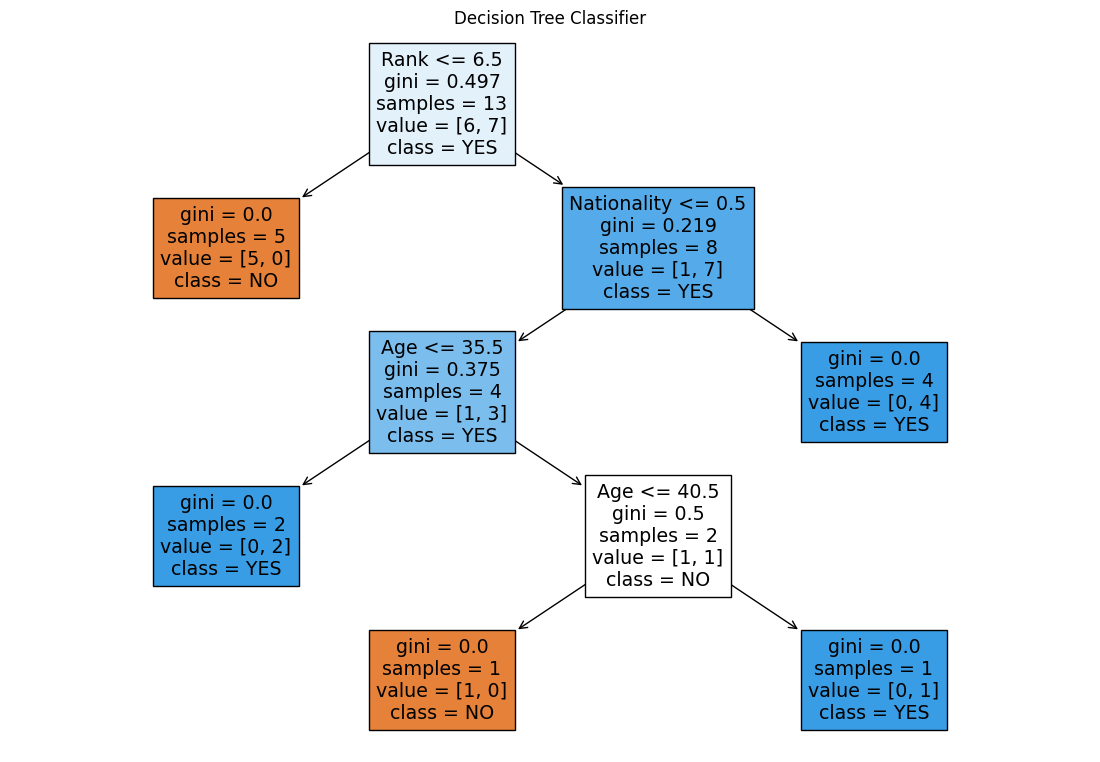

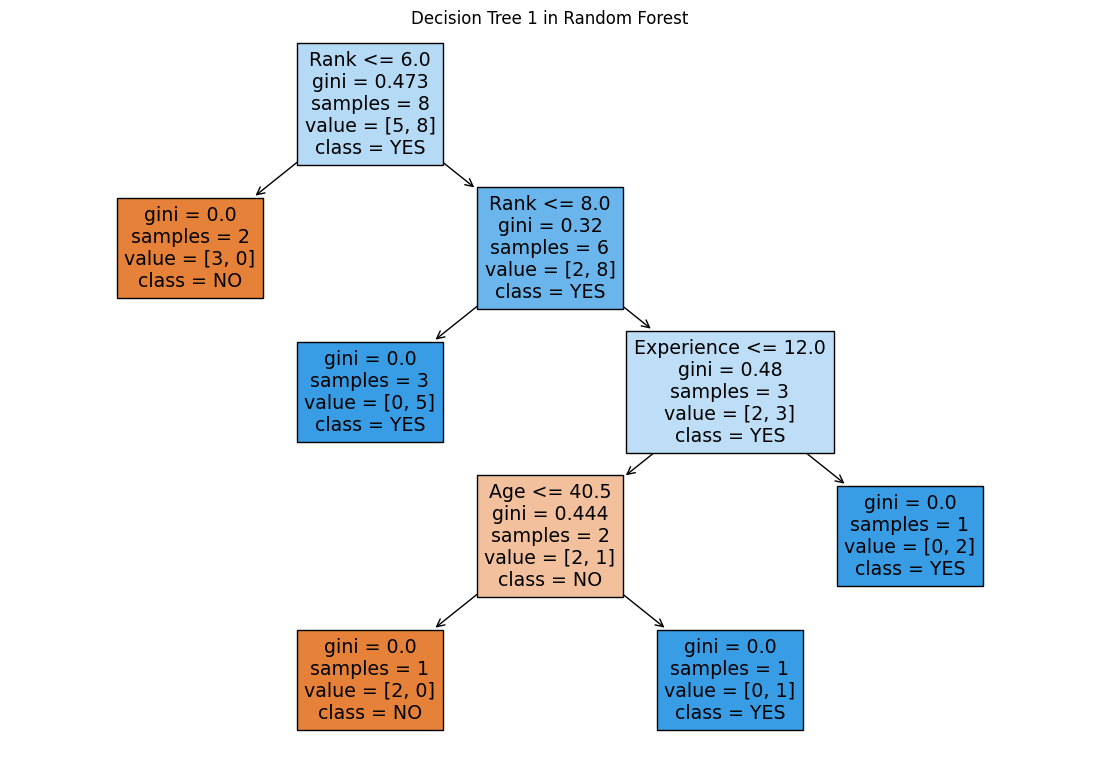

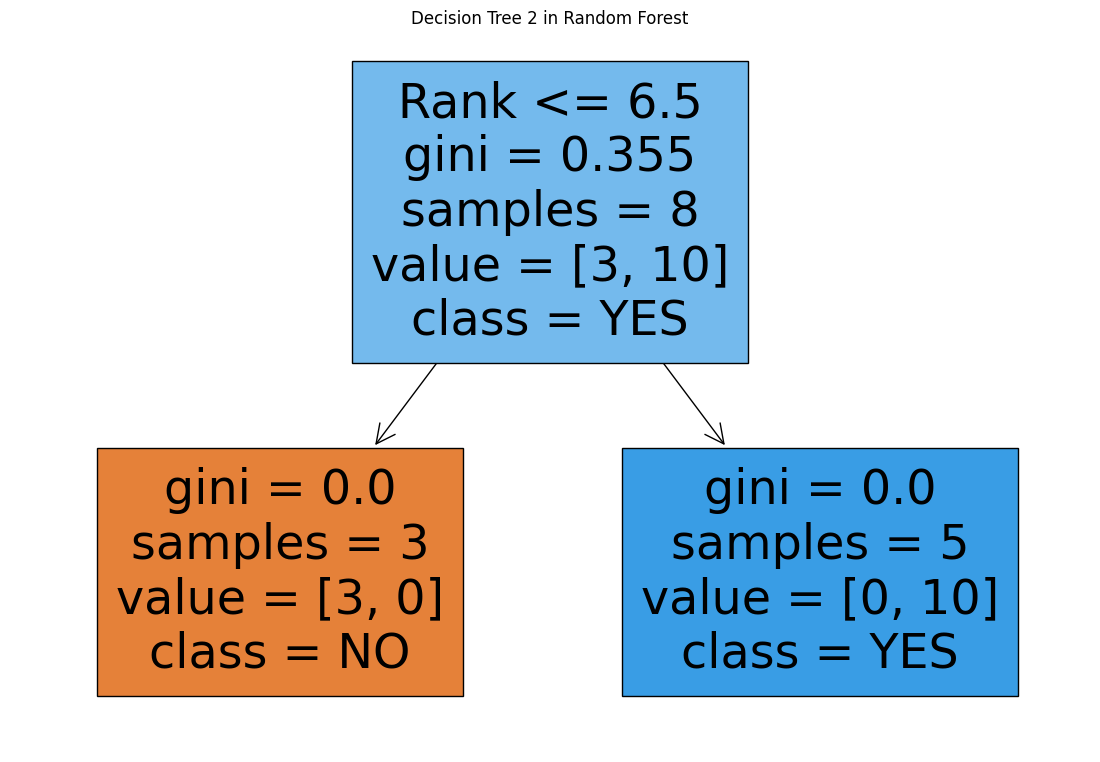

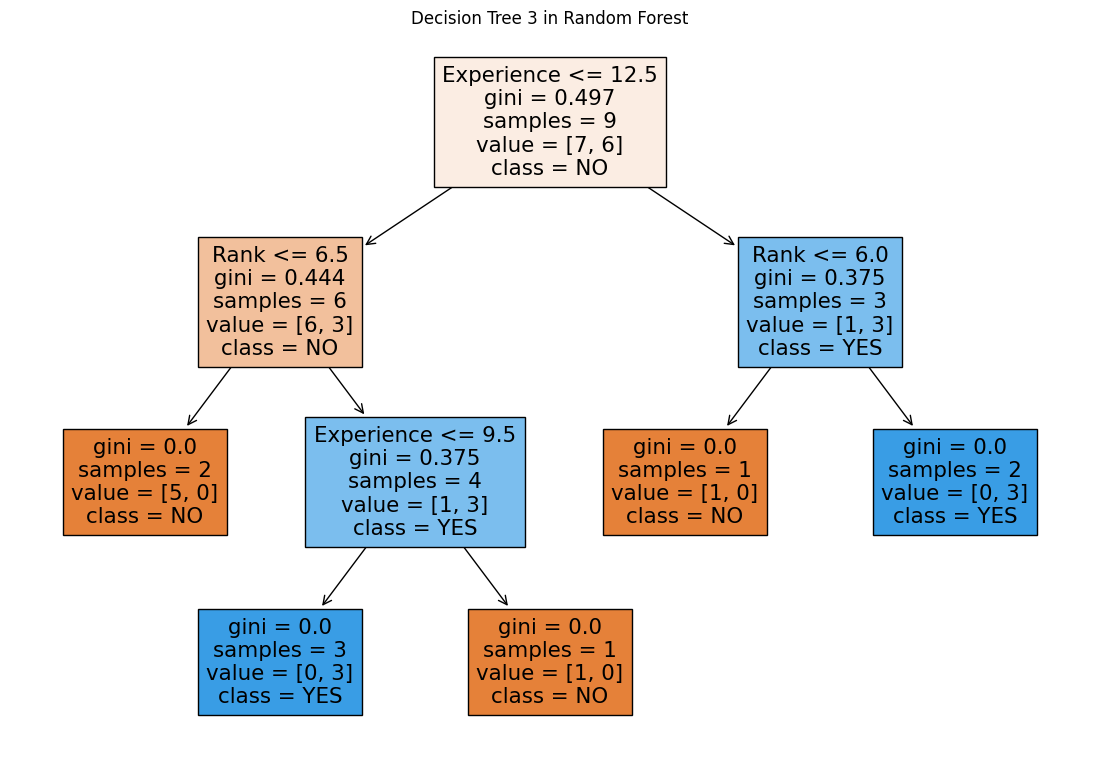

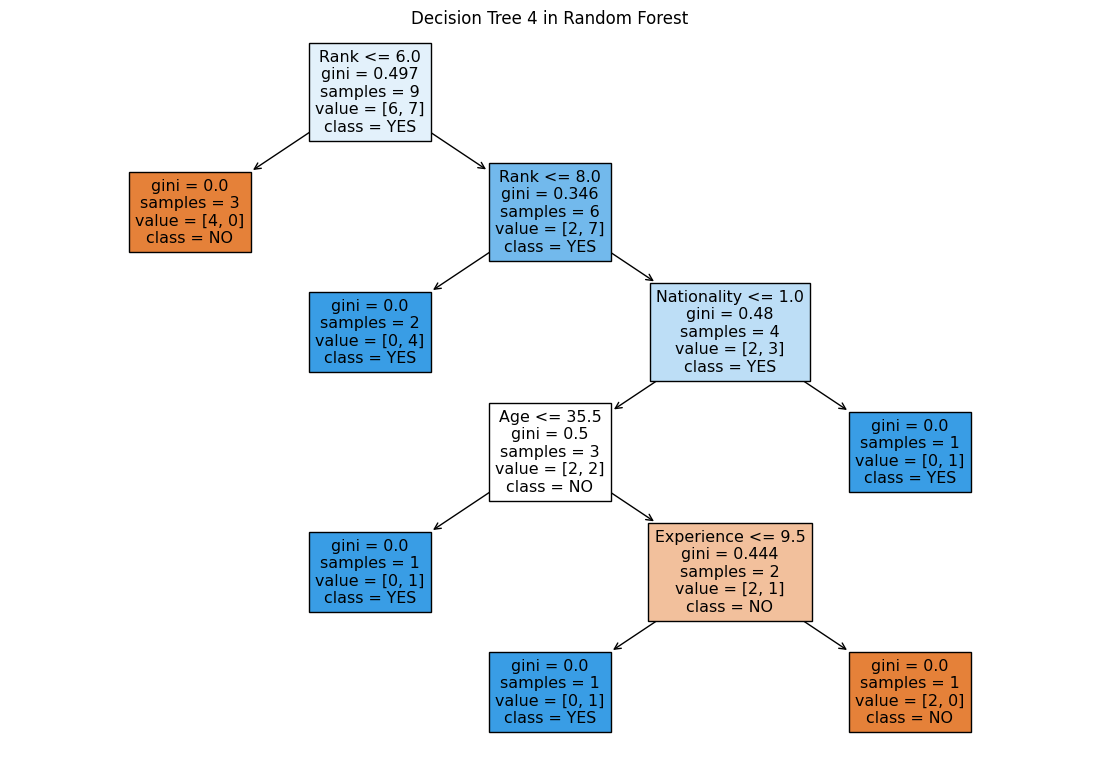

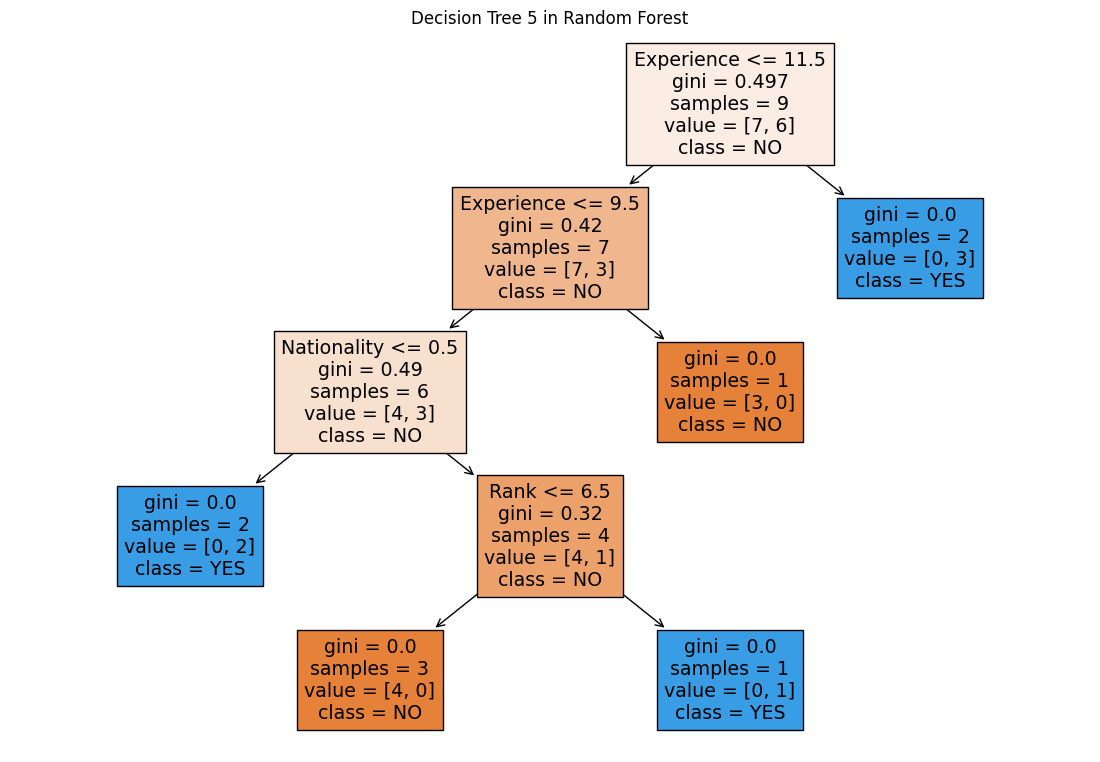

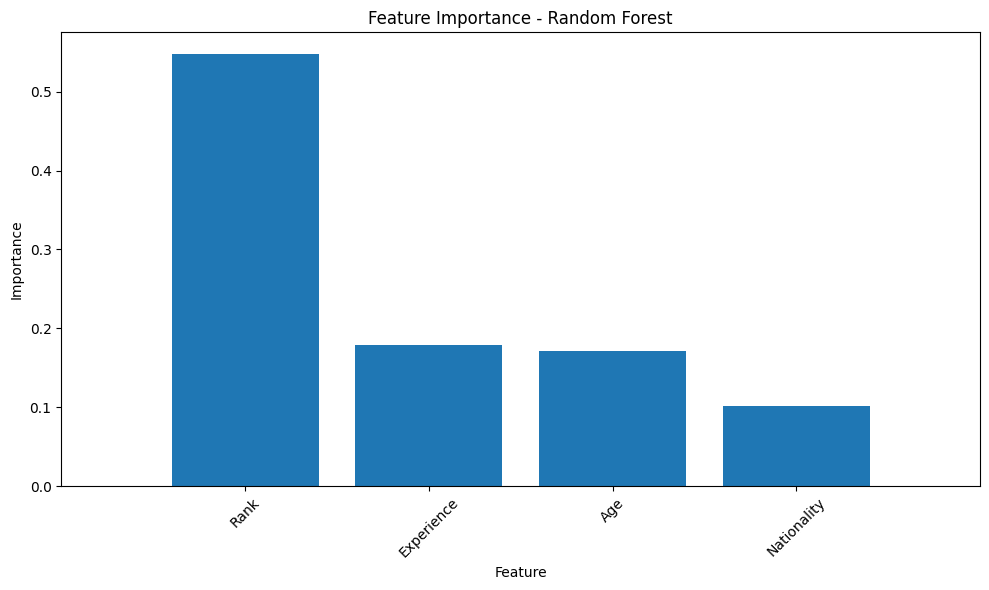

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Load data from Excel file
df = pd.read_excel("/content/datasets/Book1 (1).xlsx") # Assuming your Excel file is named "nation.xlsx"

# Mapping categorical variables to numerical values
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

# Features and target variable
features = ['Age', 'Experience', 'Rank', 'Nationality']
X = df[features]
y = df['Go']

# Decision tree classifier
dtree = DecisionTreeClassifier() # Using information gain
dtree = dtree.fit(X, y)

# Plot decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dtree, feature_names=features, class_names=['NO', 'YES'], filled=True)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.title("Decision Tree Classifier")
plt.show()

# Random Forest classifier
rf = RandomForestClassifier(n_estimators=100) # 100 decision trees
rf.fit(X, y)

# Plotting five additional decision trees from Random Forest
num_trees_to_plot = 5
for i in range(num_trees_to_plot):
    plt.figure(figsize=(12, 8))
    tree.plot_tree(rf.estimators_[i+1], feature_names=features, class_names=['NO', 'YES'], filled=True)
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    plt.title("Decision Tree {} in Random Forest".format(i+1))
    plt.show()

# Feature importance
importances = rf.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()


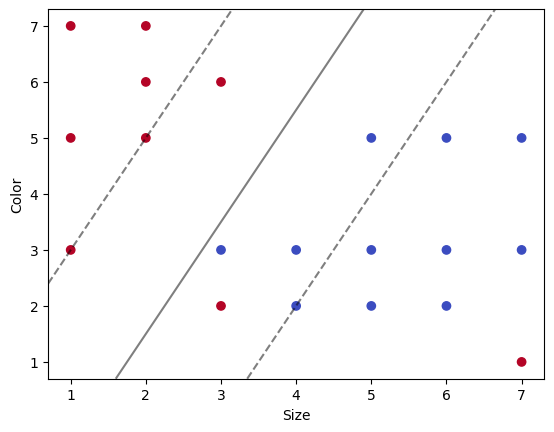

In [2]:
import numpy as np
from sklearn import svm

# Define the fruit features (size and color)
X = np.array([[5, 2], [4, 3], [1, 7], [2, 6], [5, 5], [7, 1], [6, 2], [5, 3], [3, 6], [2, 7], [6, 3], [3, 3],
              [1, 5], [7, 3], [6, 5], [2, 5], [3, 2], [7, 5], [1, 3], [4, 2]])
# Define the fruit labels (0=apples, 1=oranges)
y = np.array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0])

# Create and train the SVM classifier
clf = svm.SVC(kernel='linear').fit(X, y)

# Plot the fruits
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)  # Scatter plot of fruits with colors based on labels

# Get the current axes and set labels
ax = plt.gca()
ax.set_xlabel('Size')
ax.set_ylabel('Color')

# Get current axis limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid to evaluate the decision function
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # Evaluate decision function on meshgrid

# Plot the decision boundary
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])  # Plot decision boundary

plt.show()